In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
x = np.arange(-3, 3, 0.1)
z = sigmoid(x)
z

array([0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
       0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153,
       0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.9168273 ,
       0.92414182, 0.93086158, 0.93702664, 0.94267582, 0.94784644])

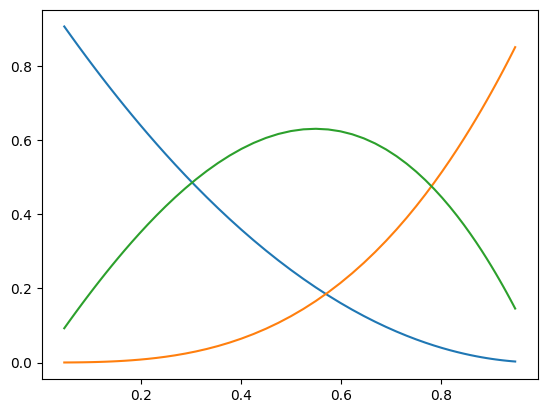

In [5]:
# Inspired by bezier curves:
y1 = (1-z) ** 2
y2 = z ** 3
y3 = 1 - y1 - y2

plt.plot(z, y1)
plt.plot(z, y2)
plt.plot(z, y3)

The middle curve is too large, the model always predicts 0.3-0.4

What we really need is s-shaped curves for neg and pos -- this answer on math stack exchange could be a possibility:

https://math.stackexchange.com/a/4453261

You can play with the equation parameters here:

https://www.desmos.com/calculator/ym0phzdvll

In [14]:
def tunable_sigmoid(x, k, b):
    def part(z, k, b):
        return b * (k - 1) * (z / b - 1) / (k - 4 * k * np.abs(z - b) - 1)
    return (part(x, k, b) + part(2 * b, k, b)) / (part(1, k, b) + part(2 * b, k, b))

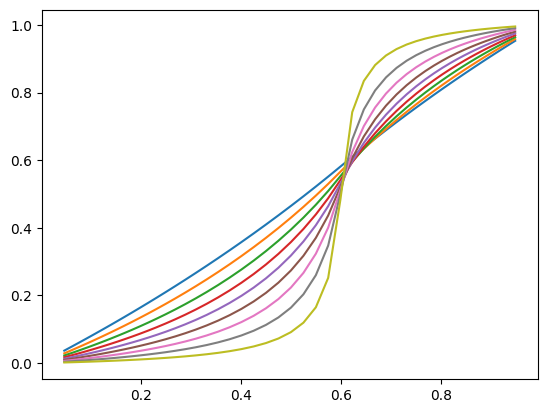

In [15]:
krange = np.arange(0.1, 1.0, 0.1)
for k in krange:
    plt.plot(z, tunable_sigmoid(z, k, 0.6))

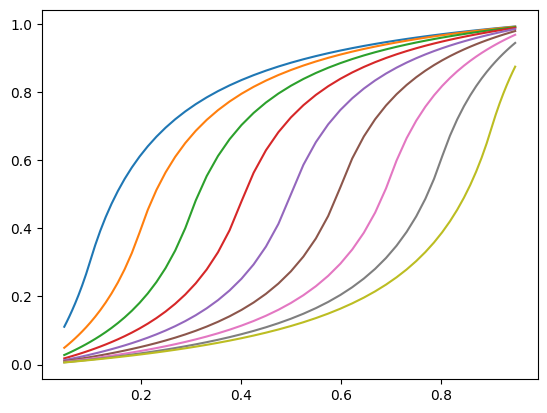

In [16]:
brange = np.arange(0.1, 1.0, 0.1)
for b in brange:
    plt.plot(z, tunable_sigmoid(z, 0.6, b))

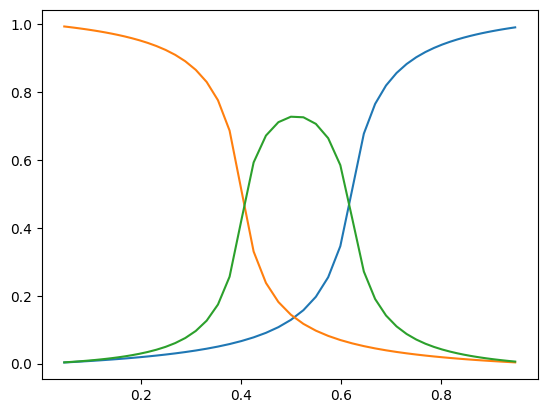

In [33]:
y1 = tunable_sigmoid(z, sigmoid(1.5), sigmoid(0.5))
y2 = tunable_sigmoid(1 - z, sigmoid(1.6), sigmoid(0.4))
y3 = 1 - y1 - y2

plt.plot(z, y1)
plt.plot(z, y2)
plt.plot(z, y3)

In [24]:
sigmoid(0.5)

np.float64(0.6224593312018546)